Implied timescales notebook
============
The purpose of this notebook is to develop a user-friendly API for computing, interpreting (and perhaps plotting) implied timescales

In [1]:
##########################################
# IMPORT ALL REQUIRED PACKAGES
##########################################
# numerics 
import numpy as np
# matplotlib
%pylab inline
import matplotlib.pyplot as plt
# emma imports
import pyemma
import pyemma.msm.analysis as msmana
import pyemma.msm.io as msmio
import pyemma.msm.generation as msmgen
# its imports
from pyemma.msm.ui.timescales import ImpliedTimescales
from pyemma.msm.estimation import number_of_states
from pyemma.msm.estimation.dense.bootstrapping import determine_lengths

Populating the interactive namespace from numpy and matplotlib


Helper functions
-----

In [2]:
def discretize(_trajs, _bounds):
    """
    discretizes the trajectories into two states split at point p
    """
    _dtrajs = []
    for _traj in _trajs:
        _dtraj = np.digitize(_traj,_bounds)
        _dtrajs.append(_dtraj)
    return _dtrajs   

In [3]:
def determine_lengths(dtrajs):
    """
    Determines the lengths of all trajectories
    """
    if (isinstance(dtrajs[0],(int,int64))):
        return len(dtrajs)*np.ones((1))
    lengths = np.zeros((len(dtrajs)))
    for i in xrange(len(dtrajs)):
        lengths[i] = len(dtrajs[i])
    return lengths

Example: Double-well potential
------------------------------

Next we probe a more complex quasi-continuous example: a metastable double-well potential with 100 microstates, out of which about 60 are populated with significant probability. We coarse-grain the double-well to a few (2 or more) sets. In the coarse-grained state space is usually connected.

In [4]:
# load T matrix
T_doublewell = msmio.read_matrix('./resources/2well.T',mode='sparse')
pi_doublewell = msmana.statdist(T_doublewell.toarray())
U_doublewell = -np.log(pi_doublewell)

In [5]:
trajs = []
T_dense=T_doublewell.toarray()
# start 500 trajectories with length 50 in left well
trajs += msmgen.generate_trajs(T_dense, 500, N=50, start=random.randint(0, 50), dt=10)
# start 100 trajectories with length 50 in right well
trajs += msmgen.generate_trajs(T_dense, 100, N=50, start=random.randint(50, 100), dt=10)

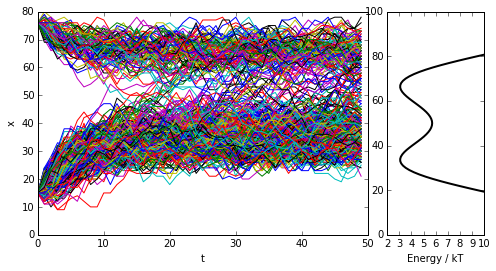

In [6]:
figure(figsize=(8, 4))
subplot2grid((1, 4), (0, 0),colspan=3)
for traj in trajs:
    plot(xrange(len(traj)), traj)
plt.xlabel('t')
plt.ylabel('x')
subplot2grid((1, 4), (0, 3))
plot(U_doublewell, xrange(len(U_doublewell)), linewidth=2, color='black')
xlim([2, 10])
plt.xlabel('Energy / kT')

In [7]:
# DECENT DISCRETIZATION
dtrajs_1 = discretize(trajs,[50])
# GOOD DISCRETIZATION
dtrajs_2 = discretize(trajs,[20,30,40,45,50,55,60,70,80])

Test
----

In [10]:
lags = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40]
# compute implied timescales
ITS = ImpliedTimescales(dtrajs_1, lags=lags, nits=5, connected=True, reversible=True)
# bootstrap
import time
start=time.time()
ITS.bootstrap(50)
stop = time.time()
print stop - start

27.6741251945


/home/marscher/workspace/pyemma/pyemma/msm/ui/timescales.py:220: UserWarning: Could not compute a single timescale at tau = 30. Probably a connectivity problem. Try using smaller lagtimes
  '. Probably a connectivity problem. Try using smaller lagtimes')


IndexError: index 9 is out of bounds for axis 0 with size 9

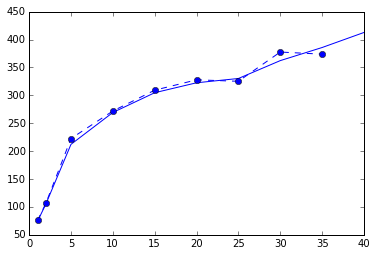

In [9]:
# plot
pyemma.plots.plot_implied_timescales(ITS)
ylim(10, 1000)

In [ ]:
# compute implied timescales
ITS2 = ImpliedTimescales(dtrajs_2, lags=lags, nits=6, connected=True, reversible=True)
# bootstrap
ITS2.bootstrap(50)

In [ ]:
pyemma.plots.plot_implied_timescales(ITS2, refs = 0.1 * msmana.timescales(T_doublewell, k=9)[1:])
xlim(1, 10)
ylim(1, 1000)

In [ ]:
pyemma.util.config.conf_values